In [31]:
#required libraries
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt  
%matplotlib inline

In [32]:
#Read data
df=pd.read_csv('https://raw.githubusercontent.com/WidhyaOrg/datasets/master/bitcoin_dataset.csv')

In [33]:
#get the shape
df.shape

(2906, 24)

In [34]:
#read first 5 rows to understand the data
df.head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/17/2010,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,...,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,2/18/2010,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,...,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,2/19/2010,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,...,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,2/20/2010,0.0,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,...,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,2/21/2010,0.0,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,...,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0


In [35]:
#Microtask1
df.loc[1023,'btc_market_price']

13.6888

In [36]:
#get the statistical info
df.describe()

,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
count,2906.000000,2.879000e+03,2.906000e+03,2.885000e+03,2877.000000,2906.000000,2906.000000,2906.000000,2894.000000,2.906000e+03,...,2906.000000,2906.000000,2.906000e+03,2906.000000,2.906000e+03,2906.000000,2906.000000,2.906000e+03,2.906000e+03,2.906000e+03
mean,839.104218,1.151138e+07,1.344352e+10,7.398381e+07,35505.502848,0.350366,0.364074,671.673651,7.501113,1.244070e+06,...,66.747821,14.639125,1.937861e+05,102081.138334,6.844558e+07,94348.852374,63140.320028,1.566216e+06,2.036475e+05,2.024338e+08
std,2304.972497,4.200024e+06,3.866841e+10,2.924228e+08,43618.633821,0.353168,0.842259,689.561322,4.974549,2.924141e+06,...,1761.894646,20.536083,2.089146e+05,103896.929350,8.285341e+07,103966.111763,69687.052174,2.278910e+06,2.682781e+05,5.800513e+08
min,0.000000,2.043200e+06,0.000000e+00,0.000000e+00,0.000000,0.000216,0.000000,1.000000,0.000000,2.250000e-05,...,0.136531,0.000000,1.100000e+02,118.000000,4.124000e+04,118.000000,118.000000,6.150000e+03,7.000000e+00,0.000000e+00
25%,6.653465,8.485300e+06,5.363081e+07,2.916456e+05,781.000000,0.024177,0.000000,54.000000,6.066667,1.160880e+01,...,1.181945,4.156470,1.675475e+04,8025.250000,2.413376e+06,6813.500000,6765.500000,4.901712e+05,9.600325e+04,9.581680e+05
50%,235.130000,1.243115e+07,3.346869e+09,1.001414e+07,15183.000000,0.196022,0.000000,375.000000,7.916667,2.176189e+04,...,2.493564,7.822430,1.304450e+05,62337.000000,3.255271e+07,53483.000000,35283.500000,1.105205e+06,1.784685e+05,3.742576e+07
75%,594.191164,1.520051e+07,8.075525e+09,2.834038e+07,58293.000000,0.676065,0.000000,1232.995223,10.208333,1.035363e+06,...,5.915591,14.800589,3.603765e+05,190471.250000,1.080663e+08,185901.750000,113793.250000,2.031654e+06,2.588046e+05,1.312499e+08
max,19498.683330,1.683769e+07,3.270000e+11,5.352016e+09,154444.590300,1.110327,7.000000,2722.625000,47.733333,2.160975e+07,...,88571.428570,161.686071,1.072861e+06,490644.000000,2.966888e+08,470650.000000,318896.000000,4.599222e+07,5.825066e+06,5.760245e+09


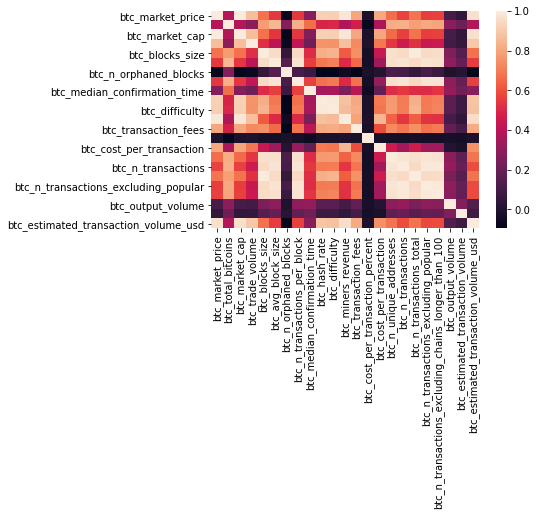

In [37]:
sns.heatmap(df.corr())

In [38]:
#from the above coorelation we can conclude 'btc_market_cap' is highy correlated to btc_market_price

C:\Users\Seema\anaconda3\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


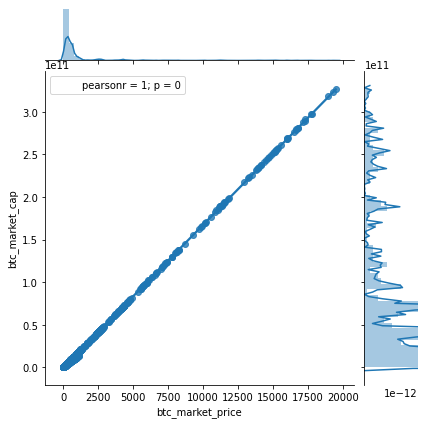

In [39]:
#draw the joint plot as microtask says
sns.jointplot(x=df['btc_market_price'],y=df['btc_market_cap'],kind="reg",stat_func=pearsonr)

In [40]:
#to know is there any null values
df.isnull().sum()

Date                                                    0
btc_market_price                                        0
btc_total_bitcoins                                     27
btc_market_cap                                          0
btc_trade_volume                                       21
btc_blocks_size                                        29
btc_avg_block_size                                      0
btc_n_orphaned_blocks                                   0
btc_n_transactions_per_block                            0
btc_median_confirmation_time                           12
btc_hash_rate                                           0
btc_difficulty                                         16
btc_miners_revenue                                      0
btc_transaction_fees                                   10
btc_cost_per_transaction_percent                        0
btc_cost_per_transaction                                0
btc_n_unique_addresses                                  0
btc_n_transact

In [41]:
#fill in null values for all the coluns
#in this column as the day is in assending order instaed of mean better to place previous index values of the same column
df['btc_total_bitcoins']=df['btc_total_bitcoins'].fillna(method='pad')


In [42]:
df['btc_trade_volume']=df['btc_trade_volume'].fillna(df['btc_trade_volume'].mean())


In [43]:
df['btc_blocks_size']=df['btc_blocks_size'].fillna(df['btc_blocks_size'].mean())


In [44]:
df['btc_median_confirmation_time']=df['btc_median_confirmation_time'].fillna(df['btc_median_confirmation_time'].mean())


In [45]:
df['btc_difficulty']=df['btc_difficulty'].fillna(df['btc_difficulty'].mean())


In [46]:
df['btc_transaction_fees']=df['btc_transaction_fees'].fillna(df['btc_transaction_fees'].mean())


In [47]:
#Conver object datatype to datetime64 and then to int64
df['Date']=pd.to_datetime(df['Date'], format='%m/%d/%Y')
print(df['Date'].dtypes)

datetime64[ns]


In [49]:
df['Date']=pd.to_numeric(df['Date'])

In [50]:
#Training the model, put X and y values as appropriate
X=df[['Date','btc_market_cap','btc_miners_revenue','btc_estimated_transaction_volume_usd']]
y=df['btc_market_price']
#print(X,y)

In [51]:
#data splitting for test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [52]:
#X_train=X_train.values.reshape(-1,1)
y_train=y_train.values.reshape(-1,1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2324, 4)
(2324, 1)
(582, 4)
(582,)


In [53]:
#Linear Regression model
lreg=LinearRegression()
lreg.fit(X_train,y_train)


LinearRegression()

In [54]:
print("lreg.coef_:",lreg.coef_)

lreg.coef_: [[ 2.98948374e-16  5.64333101e-08  2.31372347e-05 -2.97541412e-08]]


In [55]:
print("lreg.intercept_:",lreg.intercept_)

lreg.intercept_: [-379.67345717]


In [56]:
#reshaping of Coef_
new_lreg_coef_=(lreg.coef_).reshape(-1,1)

In [57]:
#Read coeffi column wise
pd.DataFrame(new_lreg_coef_, X.columns, columns = ['Coeff'])

,Coeff
Date,2.989484e-16
btc_market_cap,5.643331e-08
btc_miners_revenue,2.313723e-05
btc_estimated_transaction_volume_usd,-2.975414e-08


In [58]:
#predict value of y
y_predict=lreg.predict(X_test)

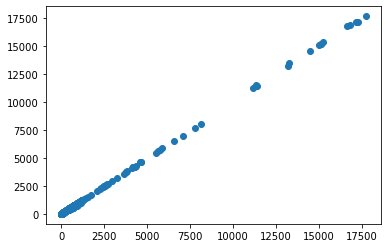

In [59]:
#scatter plot to understand the data
plt.scatter(y_test,y_predict)

In [60]:
#evaluating the performance model
from sklearn import metrics
MSE=metrics.mean_squared_error(y_test,y_predict)
MAE=metrics.mean_absolute_error(y_test,y_predict)
RMSE=np.sqrt(metrics.mean_squared_error(y_test,y_predict))
print(MSE,MAE,RMSE)

1422.5865427141327 24.211590785843914 37.71719160693347


In [61]:
lreg.score(X_train,y_train)

0.9996961000789857

In [62]:
lreg.score(X_test,y_test)

0.9997746078991544